In [10]:
using Pkg
Pkg.activate("..")   

  Activating project at `d:\GitHubProjects\GeneralisedKoornwinderPolynomials.jl`


In [9]:
using GeneralisedKoornwinderPolynomials, LinearAlgebra, Plots
using SparseArrays, BlockBandedMatrices, BlockArrays, StaticArrays

α, β, γ, δ, θ, ϵ = 0.0, 1.0, -0.3, 0.3, 7, 1

ρ(x)  = sqrt(Complex((0.5 + x) * (1 + 6x^2 - 20x^4 + 15x^6)))
dρ(x) = nothing
Fρ1(x) = (0.5 + x) * (1 + 6x^2 - 20x^4 + 15x^6)
Fρ2(x) = 0.5 * (1 + 6x + 18x^2 - 40x^3 - 100x^4 + 45x^5 + 105x^6)

gkd1 = GeneralisedKoornwinderDomain(α, β, γ, δ, ρ, θ, ϵ, dρ, Fρ1, Fρ2)

GeneralisedKoornwinderDomain(0.0, 1.0, -0.3, 0.3, Main.ρ, 7, 1, Main.dρ, Main.Fρ1, Main.Fρ2)

In [4]:
N = 500

ops1 = Semiclassical_Operatormatrices(gkd1, 0, 0, 0, 0, N)

Laplacian_W = Koornwinder_Laplacian(gkd1, ops1, N)     # Δ_{W,(1,1,1,1)}^{(1,1,1,1)}
HNW2 = Koornwinder_Conversion_NW2(gkd1, ops1, N)       # T_{(0,0,0,0)}^{(1,1,1,1)}
HW2  = Koornwinder_Conversion_W2(gkd1, ops1, N)        # T_{W,(1,1,1,1)}^{(0,0,0,0)}

Screened_Laplacian_W = Laplacian_W - 100^2 * HNW2 * HW2 

501×501-blocked 125751×125751 BandedBlockBandedMatrix{Float64} with block-bandwidths (14, 14) and sub-block-bandwidths block-bandwidths (2, 2) with data 29×501-blocked 145×125751 BlockedMatrix{Float64}:
 -197.437    │     9.58442     0.0     │    64.4964 
 ────────────┼─────────────────────────┼────────────  …    ⋅          │    ⋅        
 ─────────────┼─────────────
    9.58442  │  -110.71        0.0     │     8.66879       ⋅          │    ⋅        
    0.0      │     0.0      -149.249   │     0.0    
 ────────────┼─────────────────────────┼────────────       ⋅          │    ⋅        
 ─────────────┼─────────────
   64.4964   │     8.66879     0.0     │  -105.21          ⋅          │    ⋅        
    0.0      │     0.0        12.9116  │     0.0           ⋅          │    ⋅        
   54.0281   │    -2.1593      0.0     │   -21.4047 
 ────────────┼─────────────────────────┼────────────  …    ⋅          │    ⋅        
 ─────────────┼─────────────
   -9.45145  │    56.8624      0.0     │ 

In [5]:
f_RHS1(x,y) = 1 
f_RHS2(x,y) = (1 - x) * x * (y + 0.3*sqrt(Fρ1(x))) * (0.3*sqrt(Fρ1(x)) - y) * exp(x)
f_RHS3(x,y) = sin(50*(x - y)^2) + cos(50*(x + y)^2)

u_exact4(x,y) = (1 - x) * x * (y + 0.3*sqrt(Fρ1(x))) * (0.3*sqrt(Fρ1(x)) - y) * exp(-100 * (x^2 + y^2))
f_RHS4(x,y) = Δ(u_exact4)(x,y) - 100^2 * u_exact4(x,y)

koornwinder_coef_f1 = Koornwinder_analysis_transform(gkd1, ops1, f_RHS1, 1, 1, 1, 1, 500)
koornwinder_coef_f2 = Koornwinder_analysis_transform(gkd1, ops1, f_RHS2, 1, 1, 1, 1, 500)
koornwinder_coef_f3 = Koornwinder_analysis_transform(gkd1, ops1, f_RHS3, 1, 1, 1, 1, 500)
koornwinder_coef_f4 = Koornwinder_analysis_transform(gkd1, ops1, f_RHS4, 1, 1, 1, 1, 500)

501-blocked 125751-element BlockedVector{Float64}:
 -0.02159411672781088   
 ───────────────────────
  0.04423703379423678   
  7.198709619792586e-19 
 ───────────────────────
 -0.0595445069716606    
  3.728229674156978e-21 
  0.007687990413160423  
 ───────────────────────
  0.05852339952324191   
 -1.614078602225676e-19 
 -0.017688260282502085  
 -1.2310709420658023e-18
 ───────────────────────
  ⋮
 -0.0                   
 -0.0                   
 -0.0                   
 -0.0                   
 -0.0                   
  0.0                   
 -0.0                   
 -0.0                   
 -0.0                   

In [6]:
koornwinder_coef_u1  = Screened_Laplacian_W[Block.(1:401), Block.(1:401)] \ koornwinder_coef_f1[Block.(1:401)]
koornwinder_coef_u2 =  Screened_Laplacian_W[Block.(1:401), Block.(1:401)] \ koornwinder_coef_f2[Block.(1:401)]
koornwinder_coef_u3 =  Screened_Laplacian_W[Block.(1:401), Block.(1:401)] \ koornwinder_coef_f3[Block.(1:401)]
koornwinder_coef_u4 =  Screened_Laplacian_W[Block.(1:401), Block.(1:401)] \ koornwinder_coef_f4[Block.(1:401)]

401-blocked 80601-element BlockedVector{Float64}:
  0.0004703327160132989  
 ────────────────────────
 -0.0010282205016362799  
 -3.715882672567779e-21  
 ────────────────────────
  0.0015122662866044168  
 -2.4673010402420405e-21 
 -0.00013938365494699264 
 ────────────────────────
 -0.001735565112795299   
 -2.632513546013675e-21  
  0.000341266611768979   
  5.229832211781675e-21  
 ────────────────────────
  ⋮
 -1.2471388694854031e-117
 -5.479342035481809e-127 
  4.248890666014853e-128 
 -7.319777187494771e-137 
  3.9001137251562756e-140
  4.6864210689247447e-150
  3.7910522693325313e-150
 -3.876059853774018e-160 
  5.140237443694087e-161 

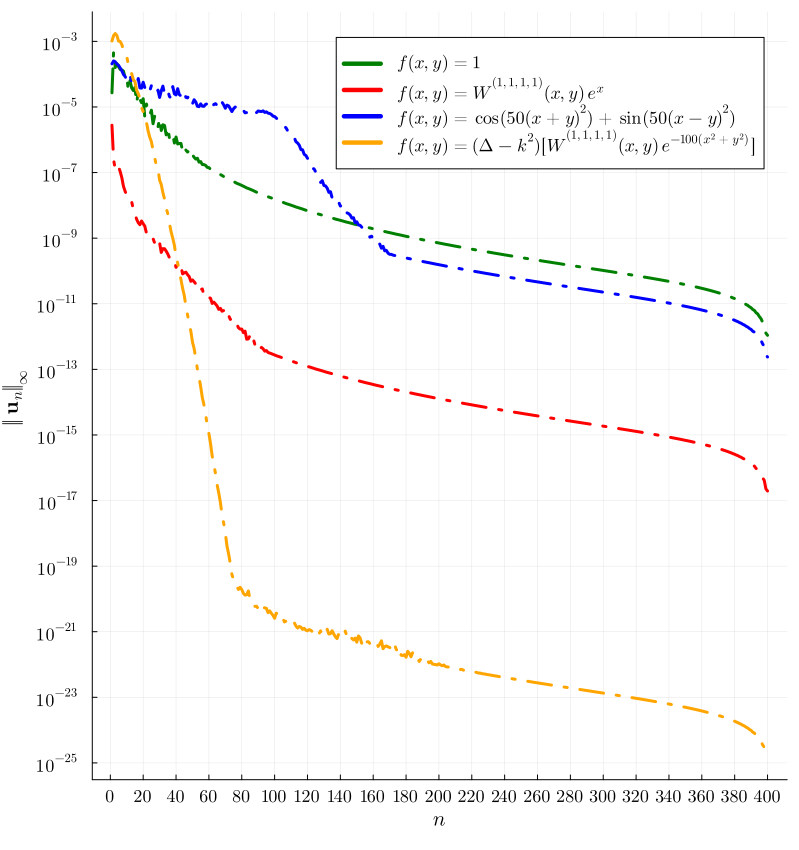

In [7]:
x_vals = 1:400
y_vals11 = zeros(length(x_vals))
y_vals22 = zeros(length(x_vals))
y_vals33 = zeros(length(x_vals))
y_vals44 = zeros(length(x_vals))

for i in 1:length(x_vals)
    n = x_vals[i] 
    y_vals11[i] = norm(koornwinder_coef_u1[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
    y_vals22[i] = norm(koornwinder_coef_u2[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
    y_vals33[i] = norm(koornwinder_coef_u3[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
    y_vals44[i] = norm(koornwinder_coef_u4[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
end

xtick_exponents = 0:20:400
xtick_vals = xtick_exponents # 10 .^ xtick_exponents
xtick_labels = ["\${$(x)}\$" for x in xtick_exponents]

ytick_exponents = -3:-2:-25
ytick_vals = 10.0 .^ ytick_exponents
ytick_labels = ["\$10^{$(y)}\$" for y in ytick_exponents]

plot(
    x_vals, y_vals11;
    #xaxis = :log10,
    size = (800,850),
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :green,
    marker = :none, 
    label = "\$f(x,y)=1\$",
    legend = :topright,
    tickfontsize = 12,
    legendfontsize = 12,
    guidefontsize = 14
    #legend_position =(0.47, 0.45)
)

plot!(
    x_vals, y_vals22;
    #xaxis = :log10,
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :red,
    marker = :none,
    label = "\$f(x,y)= W^{(1,1,1,1)}(x,y)\\, e^x \$",
    legend = :topright
    #legend_position =(0.47, 0.45)
)

plot!(
    x_vals, y_vals33;
    #xaxis = :log10,
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :blue,
    marker = :none,
    label = "\$f(x,y)= \\cos(50(x + y)^2) + \\sin(50(x - y)^2) \$",
    legend = :topright
    #legend_position =(0.47, 0.45)
)


plot!(
    x_vals, y_vals44;
    #xaxis = :log10,
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :orange,
    marker = :none,
    label = "\$f(x,y) = (\\Delta - k^2)[W^{(1,1,1,1)}(x,y)\\,e^{-100(x^2+y^2)} ]\$",
    legend = :topright
    #legend_position =(0.47, 0.45)
)

In [8]:
u_approx4 = Koornwinder_synthesis_transform(gkd1, ops1, koornwinder_coef_u4, 1, 1, 1, 1, 150)

# For the numerical examples in the paper, the lengths of x_vals0, x_vals1, y_vals0, and y_vals1 are set to 750.

x_vals1 = range(α, β, length=100) 
y_vals1 = range(-0.61, 0.61, length=100)  
z_vals1 = zeros(length(x_vals1), length(y_vals1))

for i in 1:length(x_vals1)
    for j in 1:length(y_vals1)
        x = x_vals1[i]
        y = y_vals1[j]
        if -0.3* sqrt(Fρ1(x)) <= y <= 0.3* sqrt(Fρ1(x))
            z_vals1[i, j] = u_approx4(x,y)     
        else
            z_vals1[i, j] = NaN
        end
    end
end

x_vals0 = range(α, β, length=100) 
y_vals0 = range(-0.61, 0.61, length=100)  
z_vals0 = zeros(length(x_vals0), length(y_vals0))

for i in 1:length(x_vals0)
    for j in 1:length(y_vals0)
        x = x_vals0[i]
        y = y_vals0[j]
        if -0.3* sqrt(Fρ1(x)) <= y <= 0.3* sqrt(Fρ1(x))
            z_vals0[i, j] = u_exact4(x, y)
        else
            z_vals0[i, j] = NaN
        end
    end
end

mask = .!isnan.(z_vals0) .& .!isnan.(z_vals1)

abs_err_inf = maximum(abs.(z_vals1[mask] .- z_vals0[mask]))
den = maximum(abs.(z_vals0[mask]))  # ||z0||_inf

rel_inf = den == 0 ? (abs_err_inf == 0 ? 0.0 : Inf) : abs_err_inf / den 
println("Absolute ∞-norm error = ", abs_err_inf)
println("Relative ∞-norm error = ", rel_inf)

Absolute ∞-norm error = 1.686893144812695e-17
Relative ∞-norm error = 8.04037434265008e-15


In [ ]:
u_approx2 = Koornwinder_synthesis_transform(gkd1, ops1, koornwinder_coef_u2, 1, 1, 1, 1, 150)

# For the numerical examples in the paper, the lengths of x_vals0, x_vals1, y_vals0, and y_vals1 are set to 750.

x_vals1 = range(α, β, length=100) 
y_vals1 = range(-0.61, 0.61, length=100)  
z_vals1 = zeros(length(x_vals1), length(y_vals1))

for i in 1:length(x_vals1)
    for j in 1:length(y_vals1)
        x = x_vals1[i]
        y = y_vals1[j]
        if -0.3* sqrt(Fρ1(x)) <= y <= 0.3* sqrt(Fρ1(x))
            z_vals1[i, j] = u_approx2(x,y)     
        else
            z_vals1[i, j] = NaN
        end
    end
end

xtick_exponents = 0.0:0.2:1.0
xtick_vals = xtick_exponents # 10 .^ xtick_exponents
xtick_labels = ["\${$(x)}\$" for x in xtick_exponents]

ytick_exponents = -0.5:0.25:0.5
ytick_vals = ytick_exponents
ytick_labels = ["\${$(y)}\$" for y in ytick_exponents]


contourf(
    x_vals1, y_vals1, z_vals1' .* 1e6;

    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    framestyle = :box,
    color = :inferno,
    linewidth = 0,
    levels = 100,
    xlabel = "\$x\$",
    ylabel = "\$y\$",
    aspect_ratio = :equal,
    xlims = (α, β),
    ylims = (-0.61, 0.61),
    size = (700, 850),
    grid = false,

    tickfont = font(10),
    guidefont = font(14),
        
)

x_edge = range(α, β, length=1200)
y_top = δ * real.(ρ.(x_edge))
y_bottom = γ * real.(ρ.(x_edge))

y_left = [γ * real(ρ(α)), δ * real(ρ(α))]
y_right = [γ * real(ρ(β)), δ * real(ρ(β))]
plot!(x_edge, y_top, color=:black, lw=1.0, label=false)
plot!(x_edge, y_bottom, color=:black, lw=1.0, label=false)

plot!([α, α], y_left, color=:black, lw=1.0, label=false)
plot!([β, β], y_right, color=:black, lw=1.0, label=false)
annotate!(1.02, 0.66, Plots.text("\$\\times \\, 10^{-6}\$", :left, 14))

![](FishDomain_ScreenedPoisson.png)